In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import pandas as pd

from IPython.display import Image
plt.rcParams["font.size"] = 18 #matplotlib.
%matplotlib inline

In [85]:
#make sure all 3 are in the same units.
#position = np.array([4,6,8,10,19,21,23])* 25.4/1000    #[17,2450,2120]
#wx = np.array([2050,2180,2220,2350,2800,2830,2980])*1e-6/2
#wy = np.array([1740,1820,1920,2030,2500,2550,2700])*1e-6/2

lam = 1550e-9 #light wavelengthd=24''


#out of coupler
position = np.array([3,8.5,20.5,31.125,53.5])*25.4/1000#inches
wx = np.array([846,933,1342,1814,2954])*1e-6/2 #um
wy = np.array([899,972,1340,1805,2907])*1e-6/2    #um

#after lens, uncrushed, 3rd point is at crusher mirror
#pos = [4.125,19.75,44] #inches
#w_x = [3077,2714,2242] #um
#w_y = [3017,2685,2204]    #um

#after crusher mirror, uncrushed
#pos = [20.875,69.25,121.625] #inches
#w_x = [2137,1749,2628] #um
#w_y = [2107,1798,2802] #um

#after crusher mirror, crushing 1 revolution of AJS screw
#Note: beam position lowered by ~0.5 mm at the far distance
#pos = [121.625] #inches
#w_x = [2618] #um
#w_y = [2760] #um

#fiber coupler -> M1: 12.875 in

#M1 -> M2: 23.25 in

#M2 -> L1: 21.75 in

#L1 -> M3: 8.375 in 

#M3 -> crusher: 35.625 in

#crusher -> end of bowtie: 20.75in

#Data on 10/2/23

#Uncrushed

#after crusher mirror, uncrushed
#pos = [20.875,40,62.75,121.625] #inches
#w_x = [2091,1794,1767,2690] #um
#w_y = [2123,1743,1740,2810] #um

#crushed ~3/4 of a turn, as hard as I can by hand with handle in skin between thumb and index finger
#pos = [20.875,40,62.75,121.625] #inches
#w_x = [2483,1943,1986,2659] #um
#w_y = [2350,1909,1921,2838] #um

Horizontal    Vertical
Beam waist radius[um]    444.336810  459.385426
Waist position [m]         0.080923    0.070244
Rayleigh range [inches]   15.754660   16.839876

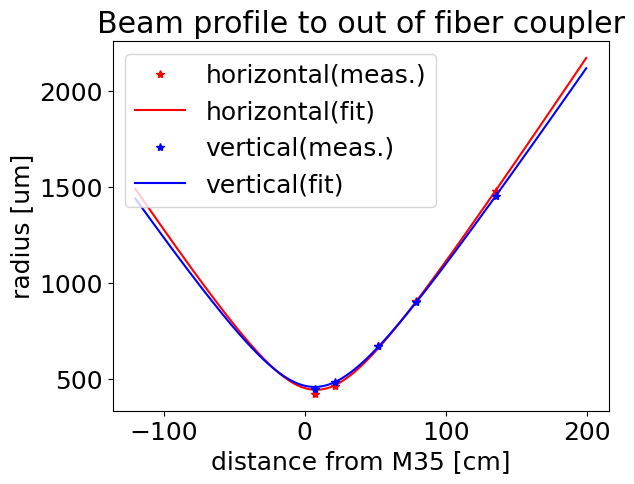

In [84]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w

lam = 1550e-9

init_w0 = 400e-6 #initial guess
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,2,0.005) #x axis on plot below

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from M35 [cm]')
plt.ylabel('radius [um]')
plt.title('Beam profile to out of fiber coupler')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))

In [24]:
scatter_loss = 12e-6
R1=.999#input
R2=.999#output
R3=.99999
R4=.99999

#loss = (1-scatter_loss)**4

#print(loss)

R = np.sqrt(R1*R2*R3*R4)
F1 = np.pi*np.sqrt(R)/(1-R)
F2 = np.pi/(1-R1)
T1= 1/(1+F1)*(loss)
T2 = 
print(F1,F2,T)
 

0.999952000863993
3108.9473798956637 3141.59265358979 0.00032153341478643945


# After lens, uncrushed, 3rd point is at crusher mirror

In [2]:
position = np.array([4.125,19.75,44])*25.4/1000 #inches
wx = np.array([3077,2714,2242])/1e6/2 #um
wy = np.array([3017,2685,2204])/1e6/2    #um

Horizontal    Vertical
Beam waist radius[um]    880.521712  884.434184
Waist position [m]         2.351957    2.301529
Rayleigh range [inches]   61.867789   62.418812

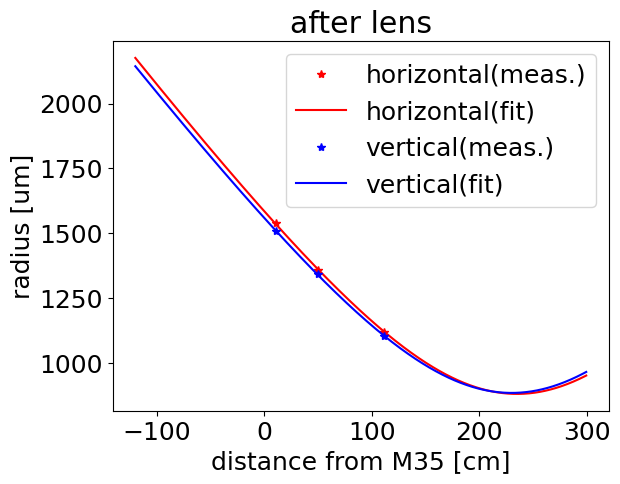

In [4]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w

lam = 1550e-9

init_w0 = 400e-6 #initial guess
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,3,0.005) #x axis on plot below

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from M35 [cm]')
plt.ylabel('radius [um]')
plt.title('after lens')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))

In [81]:
#after crusher, uncrushed
position = np.array([40,62.75,121.625])*25.4/1000 #inches
wx = np.array([1794,1767,2690])*1e-6/2 #um
wy = np.array([1743,1740,2810])*1e-6/2 #um


Horizontal    Vertical
Beam waist radius[um]    874.704238  850.501127
Waist position [m]         1.287507    1.176842
Rayleigh range [inches]   61.052987   57.721053

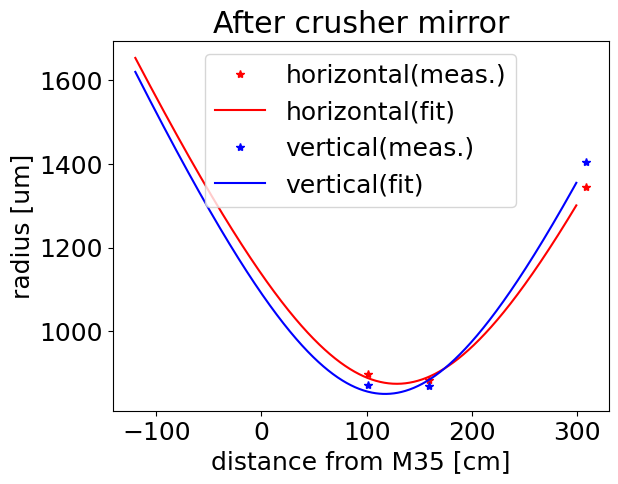

In [82]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w


lam = 1550e-9
init_w0 = 600e-6 #initial guess
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 2.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 2.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,3,0.005) #x axis on plot below

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from M35 [cm]')
plt.ylabel('radius [um]')
plt.title('After crusher mirror')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))

In [5]:
position = np.array([40,62.75,121.625])* 25.4/1000  #inches 20.875
wx = np.array([1943,1986,2659])/1e6/2 #um 2483
wy = np.array([1909,1921,2838])/1e6/2   #um 2350

[9.70971099e-04 1.28991879e+00] [9.38593115e-04 1.08156971e+00]


Horizontal    Vertical
Beam waist radius[um]    970.971099  938.593115
Waist position [m]         1.289919    1.081570
Rayleigh range [inches]   75.231040   70.297388

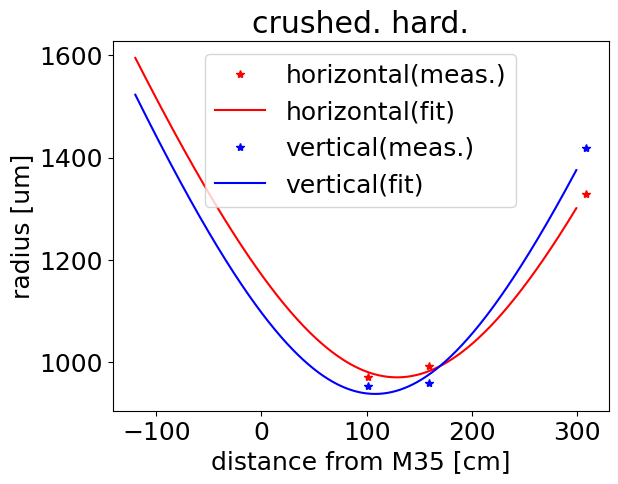

In [6]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w
lam = 1550e-9
init_w0 = 400e-6 #initial guess
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])
print(wx_popt,wy_popt)

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,3,0.005) #x axis on plot below

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from M35 [cm]')
plt.ylabel('radius [um]')
plt.title('crushed. hard.')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))

In [ ]:

                        Horizontal	Vertical
Beam waist radius[um]	874.704238	850.501127
Waist position [m]	1.287507	1.176842
Rayleigh range [inches]	61.052987	57.721053